<a href="https://colab.research.google.com/github/agreco92/Tutorials/blob/main/Tutorial_pt2_1605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# how I downloaded stuff for the ML tutorial
# !wget https://raw.githubusercontent.com/agreco92/tutorial_ML/main/data/heart_failure.csv
# df = pd.read_csv("/content/heart_failure.csv")

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [110]:
# Forward and inverse transformation functions
def sqrt_scale(x):
    return np.sqrt(x)

def inv_sqrt_scale(x):
    return np.power(x, 2)

def remove_elements(array, threshold=10):
    mask = np.logical_or(array < -threshold, array > threshold)
    return array[mask]

    # Example usage
    arr = np.array([-15, -5, 0, 5, 15])
    result = remove_elements(arr)
    print(result)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


# Define the log1p and expm1 transformation functions
def log1p_transform(x):
    return np.log(x + 5)

def expm1_transform(x):
    return np.exp(x) - 5

## 1. Images in Python

How are images represented in Python? Let's load the picture of a bee and check it out!

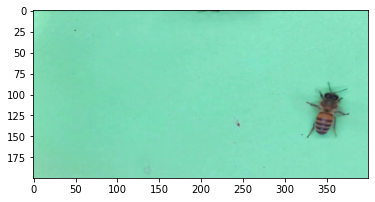

In [115]:
# Load an image
image = mpimg.imread("./datasets/weber_bees/presence_absence_task/015.jpg")

plt.imshow(image)
plt.show()

### [practice] investigation

The `plt.imshow()` function can display an image, but we still don't know how to manipulate it. Use the next few minutes to:

1. Discover the structure of the `image` object using and the `image.shape`, `image.dtype`. What is it?
2. Use slicing (`image`) to display different parts of the images. Can you "zoom" on the bee? <br>*Tip*: Define a `section` object using the slicing operation [:,:,:] and plot it using the `plt.imshow()`. What does each index represent? 

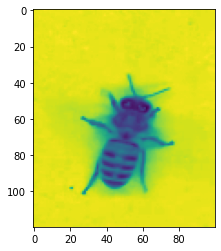

In [93]:
image.shape, image.dtype

img_slice = image[50:170, 300:400, 1]
plt.imshow(img_slice)
plt.show()

Now that we understood the structure of an image, let's see the range of values inside the matrices:

In [98]:
image[:5,:5,0]

array([[137, 137, 135, 134, 134],
       [143, 142, 140, 138, 137],
       [144, 145, 143, 142, 140],
       [148, 148, 145, 144, 139],
       [149, 148, 146, 146, 146]], dtype=uint8)

We can understand the range more completely using the `np.min()`and `np.max()` functions:

In [100]:
np.min(image), np.max(image)

(18, 240)

## 2. Dissection of a color: Red-Green-Blue colour composition

Each of the three matrices contains the pixel intensity for each colour. Let's look at each channel separately!

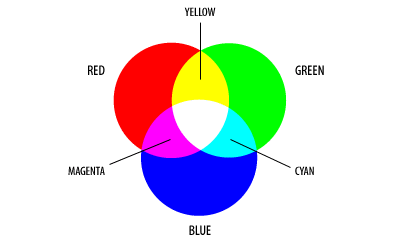

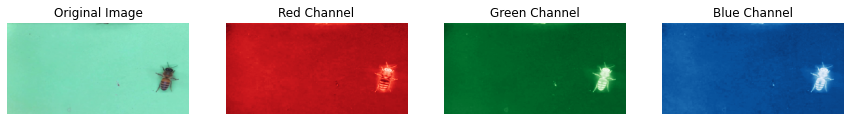

In [97]:
# Split into color channels
red_channel = image[:, :, 0]   # Red channel
green_channel = image[:, :, 1] # Green channel
blue_channel = image[:, :, 2]  # Blue channel

# Display each color channel
fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # Create 1x4 subplot

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')  # Hide axes ticks

axs[1].imshow(red_channel, cmap='Reds')
axs[1].set_title('Red Channel')
axs[1].axis('off')

axs[2].imshow(green_channel, cmap='Greens')
axs[2].set_title('Green Channel')
axs[2].axis('off')

axs[3].imshow(blue_channel, cmap='Blues')
axs[3].set_title('Blue Channel')
axs[3].axis('off')

plt.show()


In [51]:
image[:5,:5,0]

array([[137, 137, 135, 134, 134],
       [143, 142, 140, 138, 137],
       [144, 145, 143, 142, 140],
       [148, 148, 145, 144, 139],
       [149, 148, 146, 146, 146]], dtype=uint8)

#### [practice]: No Red!

Set the intensity of the blue channel to zero, see how the image looks like now!

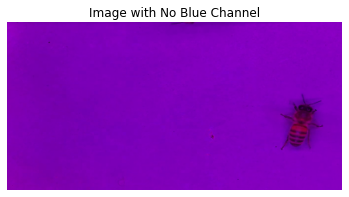

In [52]:
# Zero out the blue channel and display the modified image
image_no_blue = image.copy()
image_no_blue[:, :, 1] = 0
plt.imshow(image_no_blue)
plt.title('Image with No Blue Channel')
plt.axis('off')
plt.show()

#### [exercise] Colour alchemy
Manipulate the image to make the background orange

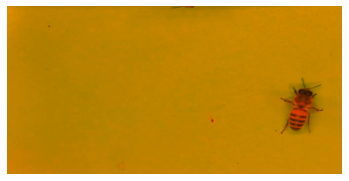

In [53]:
# Zero out the blue channel and display the modified image
image_alchemy = image.copy()
image_alchemy[:, :, 1] = 0.6 *image[:, :, 1]
image_alchemy[:, :, 0] = 1.5 *image[:, :, 0]
image_alchemy[:, :, 2] = 0

plt.imshow(image_alchemy)
plt.axis('off')
plt.show()

## "Quantify" an image: Color histograms

#### [board] What is a colour histogram?

To analyze the colours more profoundly, we can plot an historgram for the pixel intensity for each channel:

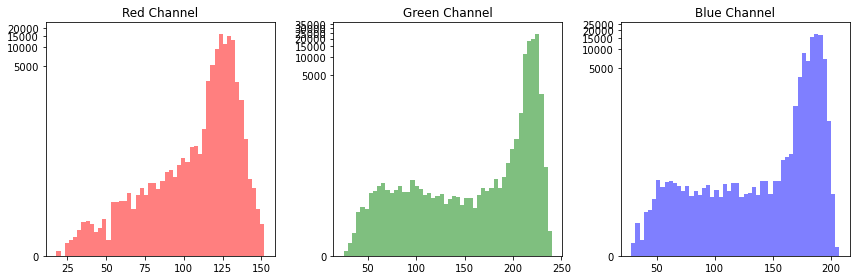

In [116]:
# Extract the red, green, and blue channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create subplots for the histograms
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms for each channel
axs[0].hist(red_channel.flatten(), bins=50, color='red', alpha=0.5)
axs[0].set_yscale('function', functions=(log1p_transform, expm1_transform))
axs[0].set_title('Red Channel')
axs[1].hist(green_channel.flatten(), bins=50, color='green', alpha=0.5)
axs[1].set_yscale('function',functions=(log1p_transform, expm1_transform))
axs[1].set_title('Green Channel')
axs[2].hist(blue_channel.flatten(), bins=50, color='blue', alpha=0.5)
axs[2].set_yscale('function', functions=(log1p_transform, expm1_transform))
axs[2].set_title('Blue Channel')
# Display the histograms
plt.tight_layout()
plt.show()

### [practice] Empty or full?

Load an image containing no bees and on containing many bees, compare the histogram with the previous image. How are they different?

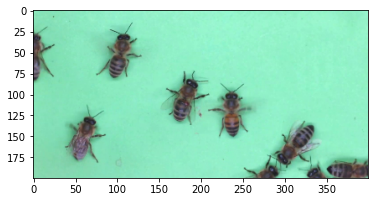

In [120]:
# Load an image
image = mpimg.imread("./datasets/weber_bees/presence_absence_task/016.jpg")

plt.imshow(image)
plt.show()

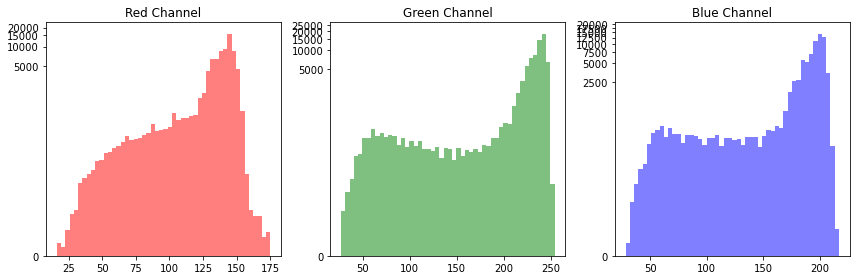

In [121]:
# Extract the red, green, and blue channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create subplots for the histograms
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms for each channel
axs[0].hist(red_channel.flatten(), bins=50, color='red', alpha=0.5)
axs[0].set_yscale('function', functions=(log1p_transform, expm1_transform))
axs[0].set_title('Red Channel')
axs[1].hist(green_channel.flatten(), bins=50, color='green', alpha=0.5)
axs[1].set_yscale('function',functions=(log1p_transform, expm1_transform))
axs[1].set_title('Green Channel')
axs[2].hist(blue_channel.flatten(), bins=50, color='blue', alpha=0.5)
axs[2].set_yscale('function', functions=(log1p_transform, expm1_transform))
axs[2].set_title('Blue Channel')
# Display the histograms
plt.tight_layout()
plt.show()

### [practice] Classification task

Now, we would like to build a program that automatically detects if there's bees on the background. Try some quantitative measures and check how they change when used on different images. To help you, I created some simple functions that you can use!



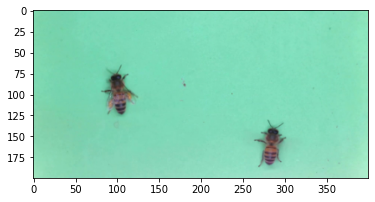

In [15]:
background = mpimg.imread('./datasets/weber_bees/presence_absence_task/018.jpg')
one_bee = mpimg.imread('./datasets/weber_bees/presence_absence_task/015.jpg')
two_bees = mpimg.imread('./datasets/weber_bees/presence_absence_task/017.jpg')
many_bees = mpimg.imread('./datasets/weber_bees/presence_absence_task/016.jpg')
plt.imshow(two_bees)

In [122]:
def count_pixels_above_trheshold(image, axis, threshold):
    return np.sum(image[:,:,axis].flatten() > threshold)

def count_pixels_below_trheshold(image, axis, threshold):
    return np.sum(image[:,:,axis].flatten() < threshold)

def count_pixels_total(image, axis):
    return image[:,:,axis].size

In [124]:
# try out the functions for yourself!

80000

### [practice] Test all images!

Now that you tested the various functions, let's play a game! Let's find the best way to classify all images in the test folder and compare it with the manual annotation. 

In [125]:
# This cell loads all the images in the folder and stores them in a list 

folder_path = './datasets/weber_bees/presence_absence_task/'  # Replace with the actual folder path

image_list = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Check if the file is an image
    if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            # Open the image file
            image = mpimg.imread(file_path)
            
            # Append the image to the list
            image_list.append(image)
        except Exception as e:
            print(f"Error loading image: {file_path} - {e}")

# Print the number of images loaded
print(f"Number of images loaded: {len(image_list)}")

Number of images loaded: 20


Add your code in the next chunk!

In [147]:
# complete the chunk with your code!
prediction_list = [] # store all the predictions here
for image in image_list:
    low_green_level = count_pixels_below_trheshold(image, axis=1, threshold=200)/count_pixels_total(image, axis=1)
    prediction = low_green_level > 0.005
    prediction_list.append(prediction)


Now your predictions can be tested against the true labels:

In [148]:
# load the table containing the real values
prediction_table = pd.read_csv('datasets/weber_bees/presence_absence_task/classification.csv')

# add the a column containint your predictions
prediction_table["prediction"] = prediction_table

<AxesSubplot:>

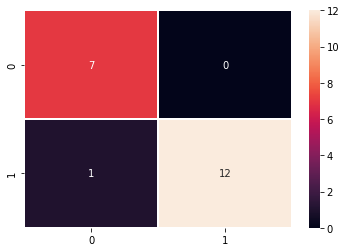

In [149]:

cm = confusion_matrix(ground_truth["prediction"], ground_truth["label"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, linewidths=2, fmt='d')
plt.title("Confusion Matrix", fontsize=25)
plt.xlabel("Predicted")
plt.ylabel("True")